# Cyber Security Salary Analysis
More info: https://www.kaggle.com/datasets/deepcontractor/cyber-security-salaries

<img src="https://storage.googleapis.com/kaggle-datasets-images/2392731/4039045/59320bd49b4c7491a6f3223e8e280cdc/dataset-cover.PNG?t=2022-08-07-07-52-01" style="width: 300px;">

In [1]:
# importing dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# from pydantic_settings import BaseSettings 
# from pandas_profiling import ProfileReport
import numpy as np

In [2]:
# settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1000)
from plotly import offline
offline.init_notebook_mode(connected=True)

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Exploring the DataFrame</div>

In [5]:
import pandas as pd

csv_url = 'https://raw.githubusercontent.com/bhuvan099/DS_project/main/salaries_cyber.csv'

data_readed = pd.read_csv(csv_url)



In [54]:
# df = pd.read_csv('./salaries_cyber.csv')
df=data_readed
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


-Our Data set contains Salary Information for different job of cyber security in different company locations.
<br>
-Thus we need to analysis the salary information with different parameters in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


In [9]:
# # creating profile
# ProfileReport(
#     df,
#     title="Cyber Security Salaries Profile"   
# )

In [10]:
# from pandas_profiling import ProfileReport

# # Rest of your code

# report = ProfileReport(df, title="Cyber Security Salaries Profile")


#### <pre>    There are some duplicated rows, but since there is no id or other feature to make sure they are the same person, i will give the benefit of the doubt. It could be that co-workers with the same position answered the survey.
#### <pre>    There is some correlation between the features which we shall explore further, but it makes me believe that a model could be made to help predict <strong>salary in usd</strong>.

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Investigating and Visualizing the Dataset</div>

In [11]:
fig = px.histogram(df.astype({'work_year':str}), x='work_year', 
                   category_orders={'work_year':['2020', '2021', '2022']}, 
                   width=1000, height=500)
fig.show()

In [12]:
fig = px.histogram(df.astype({'work_year':str}), x='work_year', color='remote_ratio' ,
                   category_orders={'work_year':['2020', '2021', '2022'], 'remote_ratio':[0,50,100]}, 
                   width=1000, height=500)
fig.show()

We can take 2022 year data for our analysis

In [13]:
df=df[df['work_year']==2022]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 711
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           579 non-null    int64 
 1   experience_level    579 non-null    object
 2   employment_type     579 non-null    object
 3   job_title           579 non-null    object
 4   salary              579 non-null    int64 
 5   salary_currency     579 non-null    object
 6   salary_in_usd       579 non-null    int64 
 7   employee_residence  579 non-null    object
 8   remote_ratio        579 non-null    int64 
 9   company_location    579 non-null    object
 10  company_size        579 non-null    object
dtypes: int64(4), object(7)
memory usage: 54.3+ KB


In [14]:
px.histogram(df, x='salary_in_usd')

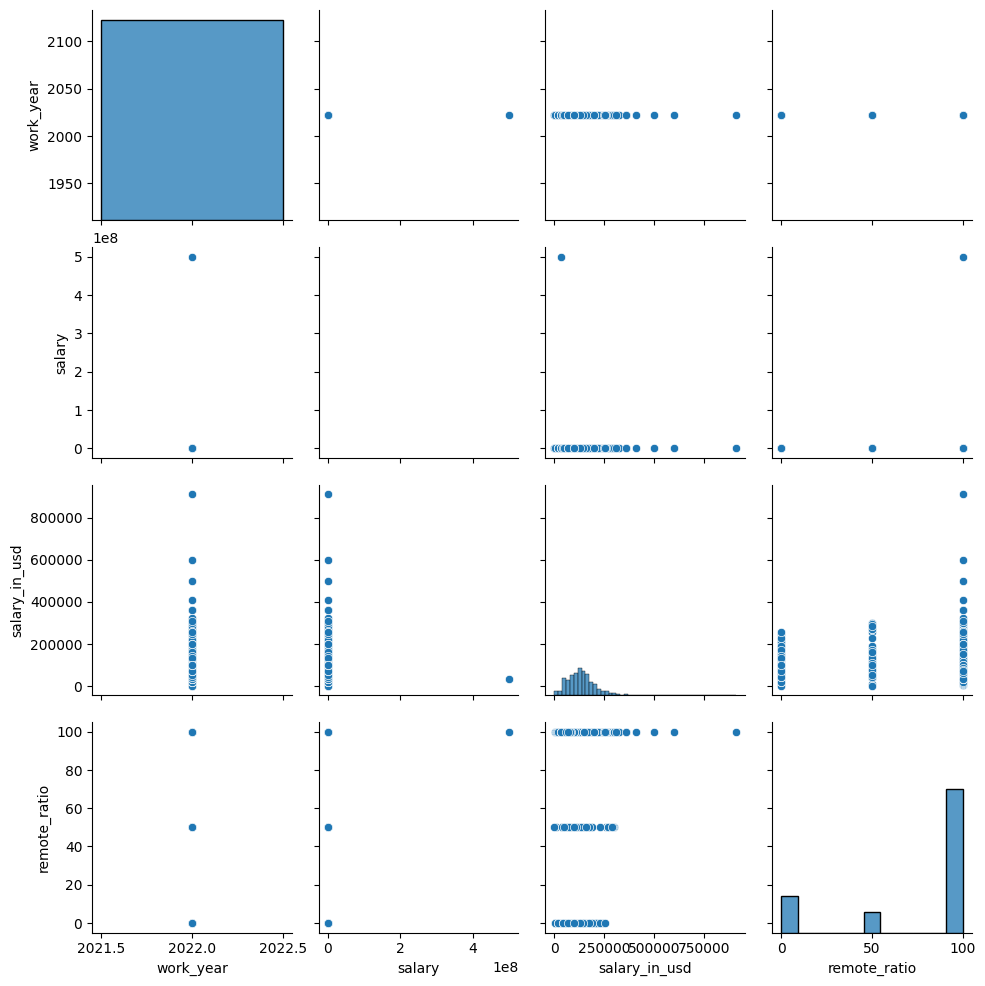

In [15]:
plot2 =  df[['work_year','salary_in_usd']]
sns.pairplot(df,hue = None,palette="cubehelix")

In [16]:
# plotting boxplots to see the relation of salary and other features
fig = px.box(df, x='experience_level', y='salary_in_usd', points='all', width=1000, height=400,
             category_orders={'experience_level':['EN', 'MI', 'SE', 'EX']}, color='experience_level')
fig.show()
fig = px.box(df, x='employment_type', y='salary_in_usd', points='all', width=1000, height=400,
             category_orders={'employment_type':['PT', 'FT', 'CT', 'FL']}, color='employment_type')
fig.show()
fig = px.box(df, x='company_size', y='salary_in_usd', points='all', width=1000, height=400,
             color='company_size')
fig.show()

  Observations:
  <ul>
  <li>First, the salary distribution is left skewed, similar to many other income distributions, and the highest bin include professionals who earn $100k-$110k</li>
  <li>Higher  <strong>experience level</strong> indeed usually means higher <strong>salary in usd</strong> and executives are the ones who earn the most. </li>
  <li>Full time jobs have the highest salaries, followed by contract jobs, but unfortunately there were not a lot of freelancers to get a better understanding of their condition. </li>
  <li>Interesting enough, medium sized companies have higher median salaries compared to large ones, but in large companies it is unlikely, but possible to earn really high salaries.</li>
  </ul>

We found out that there are features with different representation, so lets build some histograms to visualize them better

In [17]:
# plotting histograms for different categori
px.histogram(x=df['experience_level'],title='Experience Level',width=800)


In [18]:
px.histogram(x=df['employment_type'],title='Employment Type',width=800)


In [19]:
px.histogram(x=df['company_size'],title='Company Size',width=800)

Observations:
<ul>
<li>Most of the professionals are seniors, full time and work for large companies.</li>

<strong>job title</strong>, <strong>employee residence</strong> and <strong>company location</strong> those have high cardinality, which means that plotting all the categories would be hard to interpret, but i will show only the 20 most frequent.

In [20]:
top_job_titles = df['job_title'].value_counts()[:20]
top_empl_residence = df['employee_residence'].value_counts()[:20]
top_comp_location = df['company_location'].value_counts()[:20]

fig = px.bar(x=top_job_titles.index, y=top_job_titles, title='Job Title', width=1000, height=600)
fig.show()


In [21]:
fig = px.bar(x=top_empl_residence.index, y=top_empl_residence, title='Employee Residence', width=1000, height=600)
fig.show()


In [22]:
fig = px.bar(x=top_comp_location.index, y=top_comp_location, title='Company Location', width=1000, height=600)
fig.show()

The lack of representation from places other than US probably means that analysing using <strong>employee residence </strong> or <strong>company location</strong>,Since most of the data from US only.

In [23]:
# box ploting the salaries of the 20 most frequent job titles
top_job_titles_df = df[df['job_title'].isin(top_job_titles.index)]

fig = px.box(top_job_titles_df, x='job_title', y='salary_in_usd', width=1000, height=400,
             category_orders={'employment_type':top_job_titles.index}, color='job_title')
fig.show()

In [24]:
import country_converter as cc
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame 'df' with a 'company_location' column

# Convert company_location to ISO3 country codes
df['company_location'] = cc.convert(names=df['company_location'], to="ISO3")

# Group by company_location and count the occurrences
grouped = df['company_location'].value_counts().reset_index()
grouped.columns = ['company_location', 'count']

# Create a choropleth map using Plotly Express
fig = px.choropleth(
    locations=grouped['company_location'],
    locationmode="ISO-3",
    color=grouped['count'],
    title="Count of Cyber Security Professionals by Country",
    width=800,
    height=600,
    color_continuous_scale=px.colors.sequential.Greens,
    labels={'count': 'Count'},
)
fig.show()


In [25]:
# plotting median salary on a map
import country_converter as cc
df['company_location'] = cc.convert(names=df['company_location'], to="ISO3")

grouped = df[['company_location', 'salary_in_usd']].groupby('company_location').median().reset_index()

fig = px.choropleth(locations=grouped['company_location'],
                    color=grouped['salary_in_usd'],
                    title = 'Median Salary of Cyber Security Professionals Around the World',
                    width=800,
                    height=600,
                    color_continuous_scale=px.colors.sequential.Reds)
fig.show()


In [26]:
px.sunburst(top_job_titles_df, path=['job_title', 'experience_level'], width=700, height=700)

Most of the jobs in the cyber security field belong to senior professionals, and indeed <strong>security engineers</strong> are mostly seniors, but <strong>Cyber Security Analysts</strong> are mostly entry and mid level. <strong>Chief Information Security Officers</strong> are mostly executives, which makes sense. There is still more fascinating information in this graph.


In [27]:
px.sunburst(top_job_titles_df, path=['job_title', 'company_size'], width=700, height=700)

Most professionals are working in large companies, but the most common <strong>job title</strong>, <strong>Security Engineer</strong> is mostly associated with medium sized companies. <br>Same for <strong>DevSecOps Engineer</strong>.


In [28]:
px.sunburst(top_job_titles_df, path=['job_title', 'remote_ratio'], width=700, height=700,color='remote_ratio',)

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Building a Model</div>

#### <pre>    With the takeaways we got now, i will try to build some prediction models for <strong>salary in usd</strong>. We've seen that  <strong>experience level</strong>, <strong>employment type</strong>, <strong>job title</strong>, <strong>company size</strong> and <strong>company location</strong> impact <strong>salary in usd</strong> and i believe these features have some independence between each other. A professional with more experience usually earns more independent of the other variables. This and the fact they are categorical features makes me want to use <strong>Naive Bayes</strong>. In this case, the model won't try to predict an exact salary (regression), but it will try to say if a professional earns more than a certain amount or not (binary classification).

#### <pre>    One problem we have is the high cardinality of the column <strong>job title</strong>. There are many entries with very small representation and this could be a problem for the model, so, trying to mitigate this issue, i will group together the <strong>job titles</strong> with similar salary. The way i will do it is by collecting the median <strong>salary in usd</strong> of each <strong>job title</strong> and will apply a one dimensional k-means to get clusters that will be used by the model instead of <strong>job title</strong>. Also, i will group the <strong>company location</strong> entries that are different from USA.

In [29]:
# removing outliers
quant = df["salary_in_usd"].quantile(0.97)
df = df[df["salary_in_usd"] < quant]

In [30]:
# factorize company_location and group non-USA entries 
def not_usa(x):
    if x!='USA':
        return 0
    return 1
df['company_location_fact'] = df['company_location'].apply(not_usa)

In [31]:
el=df['experience_level'].unique()
et=df['employment_type'].unique()
cs=df['company_size'].unique()
cl=df['company_location'].unique()

el_mapping = {}
for i, level in enumerate(el):
    el_mapping[level] = i
    
print(el_mapping)

et_mapping = {}
for i, level in enumerate(et):
    et_mapping[level] = i
    
print(et_mapping)

cs_mapping = {}
for i, level in enumerate(cs):
    cs_mapping[level] = i
    
print(cs_mapping)
cl_mapping = {}
for i, level in enumerate(cl):
    cl_mapping[level] = i
    
print(cl_mapping)

{'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
{'FT': 0, 'CT': 1, 'PT': 2}
{'S': 0, 'M': 1, 'L': 2}
{'USA': 0, 'BRA': 1, 'BWA': 2, 'NLD': 3, 'DEU': 4, 'CAN': 5, 'CHE': 6, 'DNK': 7, 'IND': 8, 'GBR': 9, 'CHL': 10, 'ESP': 11, 'AUS': 12, 'FRA': 13, 'JPN': 14, 'GRC': 15, 'AZE': 16, 'ROU': 17, 'DZA': 18, 'ATA': 19, 'ALA': 20, 'SVN': 21, 'SWE': 22, 'HUN': 23, 'ETH': 24, 'MEX': 25, 'ISR': 26, 'ITA': 27, 'PAK': 28, 'NOR': 29, 'CZE': 30, 'IDN': 31, 'IRL': 32, 'SGP': 33}


In [32]:
for index, row in df.iterrows():
    df.at[index, 'experience_level_fact'] = el_mapping[row['experience_level']]
    df.at[index, 'employment_type_fact'] = et_mapping[row['employment_type']]
    df.at[index, 'company_size_fact'] = cs_mapping[row['company_size']]
    df.at[index, 'company_location_fact'] = cl_mapping[row['company_location']]

df.head(100)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_location_fact,experience_level_fact,employment_type_fact,company_size_fact
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,USA,S,0,0.0,0.0,0.0
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,USA,M,0,1.0,0.0,1.0
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,USA,M,0,1.0,0.0,1.0
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BRA,L,1,1.0,0.0,2.0
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BWA,S,2,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2022,SE,FT,Information Security Officer,267840,USD,267840,US,100,USA,M,0,2.0,0.0,1.0
111,2022,SE,FT,Information Security Officer,214056,USD,214056,US,100,USA,M,0,2.0,0.0,1.0
112,2022,SE,FT,Security Researcher,240000,CAD,188282,CA,100,USA,L,0,2.0,0.0,2.0
113,2022,MI,FT,Head of Information Security,107000,GBP,137290,GB,100,GBR,M,9,1.0,0.0,1.0


In [33]:
# split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# # df['job_title_fact'] = le.fit_transform(df['job_title'])
# df['experience_level_fact'] = pd.factorize(df['experience_level'])[0]
# df['employment_type_fact'] = pd.factorize(df['employment_type'])[0]
# df['company_size_fact'] = pd.factorize(df['company_size'])[0]
# df['company_location_fact'] = pd.factorize(df['company_location'])[0]
# label_encoders = {}
# categorical_columns = ['experience_level', 'employment_type', 'company_size','company_location']

# for col in categorical_columns:
#     le = LabelEncoder()
#     df[f'{col}_fact'] = le.fit_transform(df[col])
#     label_encoders[col] = le

# Now, your DataFrame has new columns with the "_fact" suffix containing encoded values.



df['sal>x'] = df['salary_in_usd'] >= 100_000

df_train, df_test, _, _ = train_test_split(df, df['sal>x'], test_size=0.2, stratify=df['sal>x'])
df_train

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_location_fact,experience_level_fact,employment_type_fact,company_size_fact,sal>x
391,2022,MI,FT,Information Security Engineer,45000,USD,45000,RO,100,ROU,L,17,1.0,0.0,2.0,False
415,2022,EN,FT,DevOps Security Engineer,70000,USD,70000,US,100,USA,L,0,0.0,0.0,2.0,False
333,2022,SE,FT,Security Engineer,176080,USD,176080,US,100,USA,M,0,2.0,0.0,1.0,True
384,2022,SE,FT,Cloud Security Architect,224000,USD,224000,US,100,USA,L,0,2.0,0.0,2.0,True
668,2022,EX,FT,Head of Security,200000,USD,200000,US,100,USA,L,0,3.0,0.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2022,SE,FT,Threat Intelligence Analyst,130800,USD,130800,US,100,USA,M,0,2.0,0.0,1.0,True
429,2022,SE,FT,Vulnerability Management Engineer,130000,USD,130000,US,0,USA,L,0,2.0,0.0,2.0,True
326,2022,MI,FT,Security Engineer,210000,USD,210000,US,100,USA,M,0,1.0,0.0,1.0,True
181,2022,MI,FT,Detection Engineer,160080,USD,160080,US,100,USA,M,0,1.0,0.0,1.0,True


In [34]:
# creating df of median_salaries
median_salaries = df_train[['job_title', 'salary_in_usd']].groupby('job_title').median()
median_salaries

,salary_in_usd
job_title,
Application Security Analyst,55110.5
Application Security Engineer,200000.0
Application Security Specialist,85000.0
Azure Security Engineer,60000.0
Chief Information Security Officer,118002.0
...,...
Threat Intelligence Analyst,126000.0
Threat Intelligence Response Analyst,220000.0
Vulnerability Analyst,115000.0


In [35]:
# clustering the medians and adding as a column in median_salaries
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15)
median_salaries['cluster'] = kmeans.fit_predict(median_salaries)
median_salaries

,salary_in_usd,cluster
job_title,,
Application Security Analyst,55110.5,0
Application Security Engineer,200000.0,7
Application Security Specialist,85000.0,13
Azure Security Engineer,60000.0,12
Chief Information Security Officer,118002.0,8
...,...,...
Threat Intelligence Analyst,126000.0,4
Threat Intelligence Response Analyst,220000.0,3
Vulnerability Analyst,115000.0,8


In [36]:
px.scatter(median_salaries, x='salary_in_usd', color='cluster')

In [37]:
# join median_salaries in df 
df_train = df_train.set_index('job_title').join(median_salaries[['cluster']], on='job_title', how='left', lsuffix='_df_train', rsuffix='_median_salaries').reset_index()
df_test = df_test.set_index('job_title').join(median_salaries[['cluster']], on='job_title', how='left', lsuffix='_df_test', rsuffix='_median_salaries').reset_index()

# drop nan values
df_test.dropna(inplace=True)

Let us take data for Security Engineer(job_title) for prediction purpose

In [38]:
df_train=df_train[df_train['job_title']=='Security Engineer']
df_test=df_test[df_test['job_title']=='Security Engineer']

In [39]:
px.scatter(df_train, x='salary_in_usd',  y='job_title', color='cluster')

### Fitting in Naive Bayes

In [40]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split

X_train = df_train[
    ['experience_level_fact', 'employment_type_fact', 'company_size_fact', 'company_location_fact']
]
y_train = df_train['sal>x']

X_test = df_test[
    ['experience_level_fact', 'employment_type_fact', 'company_size_fact', 'company_location_fact']
]
y_test = df_test['sal>x']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

nb = CategoricalNB()
nb.fit(X_train, y_train)

CategoricalNB()

In [41]:
from sklearn.metrics import accuracy_score

# train accuracy
accuracy_score(y_train, nb.predict(X_train))


0.9212598425196851

In [42]:
# Example input data with categorical values

new_input_data_dict = {
    'experience_level': ['MI'],
    'employment_type': ['FT'],
    'company_size': ['M'],
    'company_location': ['JPN'],
}
new_input_data = pd.DataFrame(new_input_data_dict)
new_input_data['experience_level_fact'] = new_input_data['experience_level'].map(el_mapping)
new_input_data['employment_type_fact'] = new_input_data['employment_type'].map(et_mapping)
new_input_data['company_size_fact'] = new_input_data['company_size'].map(cs_mapping)
new_input_data['company_location_fact'] = new_input_data['company_location'].map(cl_mapping)


    
print (new_input_data)
# Define the features for prediction, including the encoded features
X_new = new_input_data[['experience_level_fact', 'employment_type_fact', 'company_size_fact', 'company_location_fact']]

# Make predictions using the trained CategoricalNB model for the new input data
predicted_class = nb.predict(X_new)

# The 'predicted_class' variable will contain the prediction (True or False)
print("Predicted Salary >= $100,000:", predicted_class)




  experience_level employment_type company_size company_location  \
0               MI              FT            M              JPN   

   experience_level_fact  employment_type_fact  company_size_fact  \
0                      1                     0                  1   

   company_location_fact  
0                     14  
Predicted Salary >= $100,000: [False]


In [43]:
# test accuracy
accuracy_score(y_test, nb.predict(X_test))

0.875

### Random Forest 


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
accuracy_score(y_test, rf.predict(X_test))

0.875

#### <pre>    Both models have similar accuracy score and, since salary is an attribute that can vary a lot, it went better than i expected.

In [46]:
df2 = data_readed
df2=df2[df2['job_title']=='Cyber Security Analyst']

In [47]:
el2=df2['experience_level'].unique()
et2=df2['employment_type'].unique()
cs2=df2['company_size'].unique()
cl2=df2['company_location'].unique()

el_mapping2 = {}
for i, level in enumerate(el2):
    el_mapping2[level] = i
    
print(el_mapping2)

et_mapping2 = {}
for i, level in enumerate(et2):
    et_mapping2[level] = i
    
print(et_mapping2)

cs_mapping2 = {}
for i, level in enumerate(cs2):
    cs_mapping2[level] = i
    
print(cs_mapping2)
cl_mapping2 = {}
for i, level in enumerate(cl2):
    cl_mapping2[level] = i
    
print(cl_mapping2)

{'EN': 0, 'MI': 1, 'SE': 2}
{'CT': 0, 'FT': 1}
{'S': 0, 'L': 1, 'M': 2}
{'BW': 0, 'US': 1, 'IN': 2, 'SG': 3, 'CH': 4, 'DE': 5, 'BR': 6, 'AE': 7, 'IE': 8, 'CA': 9, 'KE': 10, 'GB': 11, 'NL': 12, 'DK': 13, 'RS': 14, 'SI': 15, 'AU': 16, 'ZA': 17, 'JP': 18, 'IT': 19, 'PT': 20, 'SE': 21, 'IL': 22}


In [48]:
for index, row in df2.iterrows():
    df2.at[index, 'experience_level_fact'] = el_mapping2[row['experience_level']]
    df2.at[index, 'employment_type_fact'] = et_mapping2[row['employment_type']]
    df2.at[index, 'company_size_fact'] = cs_mapping2[row['company_size']]
    df2.at[index, 'company_location_fact'] = cl_mapping2[row['company_location']]

In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define your features (X) and target (y)
feature_columns =['work_year','experience_level_fact', 'employment_type_fact', 'company_size_fact', 'company_location_fact']
X = df2[feature_columns]
y = df2['salary_in_usd']

# Assuming df2 is your dataset and 'work_year' is a column indicating the year

# Filter the data for training (years 2020, 2021, 2022) and target (year 2023)
X_train = df2.loc[df2['work_year'].isin([2020, 2021])][feature_columns]
y_train = df2.loc[df2['work_year'].isin([2020, 2021])]['salary_in_usd']
X_target = df2.loc[df2['work_year'] == 2022][feature_columns]
y_target = df2.loc[df2['work_year'] == 2022]['salary_in_usd']

# Now you have X_train, y_train for training data and X_target, y_target for the target year (2023).

# Create and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


# Evaluate the model (if needed)



RandomForestRegressor(random_state=42)

In [50]:
from sklearn.metrics import mean_squared_error
y_pred = rf_regressor.predict(X_target)
mse = mean_squared_error(y_target, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 831361757.9431539


In [51]:
from sklearn.metrics import r2_score

# Calculate R-squared (R²) for your model
r2 = r2_score(y_target, y_pred)
print("R-squared (R²):", r2)


R-squared (R²): 0.2958483788498444


In [52]:
X_input_data_dict = {
    'work_year' :['2022'],
    'experience_level': ['MI'],
    'employment_type': ['FT'],
    'company_size': ['M'],
    'company_location': ['US'],
}
X_new = pd.DataFrame(X_input_data_dict)
X_new['experience_level_fact'] = X_new['experience_level'].map(el_mapping2)
X_new['employment_type_fact'] = X_new['employment_type'].map(et_mapping2)
X_new['company_size_fact'] = X_new['company_size'].map(cs_mapping2)
X_new['company_location_fact'] = X_new['company_location'].map(cl_mapping2)

X_to_predict=X_new[feature_columns]
print(X_to_predict)


  work_year  experience_level_fact  employment_type_fact  company_size_fact  \
0      2022                      1                     1                  2   

   company_location_fact  
0                      1  


In [53]:
y_new_pred = rf_regressor.predict(X_to_predict)
print("Salary Predicted in Dollars : {:.2f}".format(y_new_pred[0]))

Salary Predicted in Dollars : 115520.69
